In [1]:
import pandas as pd 
import os

In [2]:
os.getcwd()

'C:\\Users\\SerBeld\\Desktop\\Tensorflow\\Class\\Regresión'

In [3]:
base = pd.read_csv('kc_house_data.csv')
base.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# id 1
# date 2
# price 3
# bedrooms 4
# bathrooms 5
# sqft_living 6
# sqft_lot 7
# floors 8
# waterfront 9
# view 10
# condition 11
# grade 12
# sqft_above 13
# sqft_basement 14 
# yr_built 15
# yr_renovated 16
# zipcode 17
# lat 18
# long 19
# sqft_living15 20
# sqft_lot15 21

# Don't use (id, date, sqft_living15,sqft_lot15).

x= base.iloc[:,3:19].values
y= base.iloc[:,2:3].values

In [5]:
x 

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03, ...,  9.81780e+04,
         4.75112e+01, -1.22257e+02],
       [ 3.00000e+00,  2.25000e+00,  2.57000e+03, ...,  9.81250e+04,
         4.77210e+01, -1.22319e+02],
       [ 2.00000e+00,  1.00000e+00,  7.70000e+02, ...,  9.80280e+04,
         4.77379e+01, -1.22233e+02],
       ...,
       [ 2.00000e+00,  7.50000e-01,  1.02000e+03, ...,  9.81440e+04,
         4.75944e+01, -1.22299e+02],
       [ 3.00000e+00,  2.50000e+00,  1.60000e+03, ...,  9.80270e+04,
         4.75345e+01, -1.22069e+02],
       [ 2.00000e+00,  7.50000e-01,  1.02000e+03, ...,  9.81440e+04,
         4.75941e+01, -1.22299e+02]])

In [6]:
y

array([[221900.],
       [538000.],
       [180000.],
       ...,
       [402101.],
       [400000.],
       [325000.]])

In [7]:
x.shape #Visualizar estrucutra de datos 

(21613, 16)

In [8]:
y.shape

(21613, 1)

In [9]:
from sklearn.preprocessing import StandardScaler, Normalizer
scalerX = StandardScaler()
x = scalerX.fit_transform(x)
scalerY = StandardScaler()
y = scalerY.fit_transform(y)

In [10]:
x

array([[-0.39873715, -1.44746357, -0.97983502, ...,  1.87015159,
        -0.35257175, -0.30607896],
       [-0.39873715,  0.1756067 ,  0.53363434, ...,  0.87956753,
         1.16156823, -0.74634143],
       [-1.47395936, -1.44746357, -1.42625404, ..., -0.9333882 ,
         1.28353661, -0.13565477],
       ...,
       [-1.47395936, -1.77207762, -1.15404732, ...,  1.23468257,
         0.24788796, -0.60432128],
       [-0.39873715,  0.50022075, -0.52252773, ..., -0.95207846,
        -0.18441416,  1.02891048],
       [-1.47395936, -1.77207762, -1.15404732, ...,  1.23468257,
         0.24572284, -0.60432128]])

In [11]:
y

array([[-0.86671733],
       [-0.00568792],
       [-0.98084935],
       ...,
       [-0.37586519],
       [-0.38158814],
       [-0.58588173]])

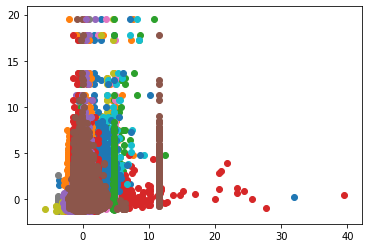

In [12]:
#Graficar
import matplotlib.pyplot as plt
%matplotlib inline

x = x.astype('float32')
y = y.astype('float32')

plt.scatter(x[:,0],y)
plt.scatter(x[:,1],y)
plt.scatter(x[:,2],y)
plt.scatter(x[:,3],y)
plt.scatter(x[:,4],y)
plt.scatter(x[:,5],y)
plt.scatter(x[:,6],y)
plt.scatter(x[:,7],y)
plt.scatter(x[:,8],y)
plt.scatter(x[:,9],y)
plt.scatter(x[:,10],y)
plt.scatter(x[:,11],y)
plt.scatter(x[:,12],y)
plt.scatter(x[:,13],y)
plt.scatter(x[:,14],y)
plt.scatter(x[:,15],y)

In [13]:
import numpy as np

In [14]:
import tensorflow as tf

In [15]:
np.random.seed(0)

R = np.random.rand(16)
R = R.astype('float32')
random_b = tf.Variable(R)
bo = tf.Variable(R[0])


#print(np.size(random_b))

In [16]:
batch_size = 32 #Tomamos 32 filas de la basedata
xph = tf.placeholder('float32', [batch_size,16])
yph = tf.placeholder('float32', [batch_size,16])
print(xph)

Tensor("Placeholder:0", shape=(32, 16), dtype=float32)


In [17]:

y_modelo = bo + np.dot(xph,random_b)


In [18]:
error = tf.losses.mean_squared_error(yph, y_modelo)

W1124 22:35:07.913183 15248 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\losses\losses_impl.py:121: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [19]:
optimizador = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
entrenamiento = optimizador.minimize(error)
init = tf.global_variables_initializer ()

In [20]:
with tf.Session() as sess:
    sess.run(init)
    for i in range (10):
        indices = np.random.randint(len(x), size = batch_size)
        ########################################################
        rock = (y[indices],y[indices],y[indices],y[indices],y[indices],y[indices],y[indices],y[indices],
                y[indices],y[indices],y[indices],y[indices],y[indices],y[indices],y[indices],y[indices])
        
        rockandroll = np.array(rock)
        #print(rockandroll.shape)
        r = rockandroll[:,:,0]
        rinv = np.matrix.transpose(r)
        #print(rinv.shape)
        ########################################################
        feed = {xph:x[indices],yph:rinv}
        sess.run(entrenamiento, feed_dict = feed)
    bo_final , b1_final = sess.run([bo,random_b])

In [21]:
bo_final

0.5370609

In [22]:
b1_final

array([0.5484288 , 0.71485686, 0.602855  , 0.5445109 , 0.4234566 ,
       0.6457713 , 0.43753445, 0.8906957 , 0.9633505 , 0.38367662,
       0.7910599 , 0.5284344 , 0.5674589 , 0.9244562 , 0.07128085,
       0.08704343], dtype=float32)

In [23]:
prevision = bo_final * b1_final*x

In [24]:
prevision

array([[-0.11744391, -0.55571264, -0.31724107, ...,  0.92851025,
        -0.01349721, -0.01430846],
       [-0.11744391,  0.06741922,  0.17277473, ...,  0.43669587,
         0.04446734, -0.03488969],
       [-0.4341395 , -0.55571264, -0.46177807, ..., -0.46341723,
         0.04913655, -0.00634154],
       ...,
       [-0.4341395 , -0.68033904, -0.37364575, ...,  0.61300665,
         0.00948969, -0.02825058],
       [-0.11744391,  0.1920456 , -0.16917874, ..., -0.47269675,
        -0.00705977,  0.04809912],
       [-0.4341395 , -0.68033904, -0.37364575, ...,  0.61300665,
         0.0094068 , -0.02825058]], dtype=float32)

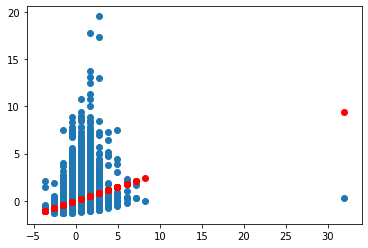

In [25]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],prevision[:,0],color = 'red')

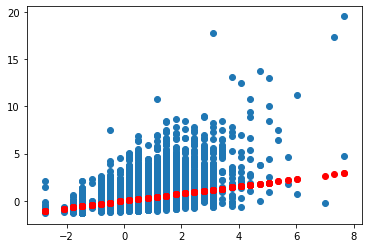

In [26]:
plt.scatter(x[:,1],y)
plt.scatter(x[:,1],prevision[:,1],color = 'red')

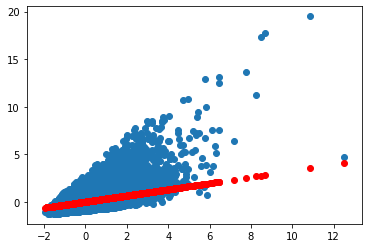

In [27]:
plt.scatter(x[:,2],y)
plt.scatter(x[:,2],prevision[:,2],color = 'red')

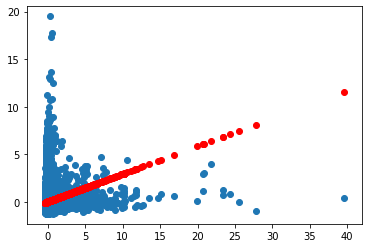

In [28]:
plt.scatter(x[:,3],y)
plt.scatter(x[:,3],prevision[:,3],color = 'red')

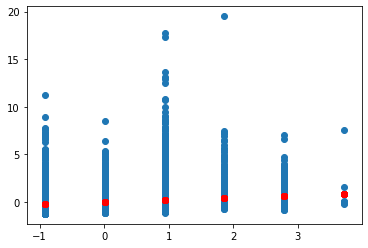

In [29]:
plt.scatter(x[:,4],y)
plt.scatter(x[:,4],prevision[:,4],color = 'red')

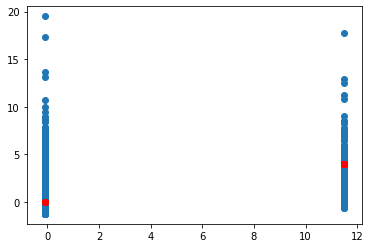

In [30]:
plt.scatter(x[:,5],y)
plt.scatter(x[:,5],prevision[:,5],color = 'red')

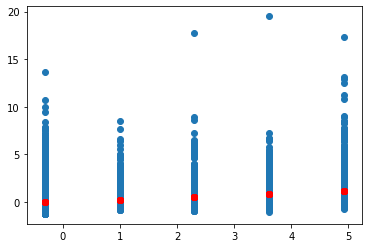

In [31]:
plt.scatter(x[:,6],y)
plt.scatter(x[:,6],prevision[:,6],color = 'red')

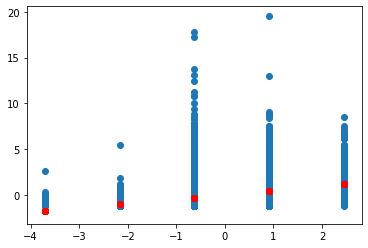

In [32]:
plt.scatter(x[:,7],y)
plt.scatter(x[:,7],prevision[:,7],color = 'red')

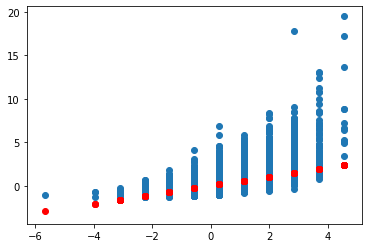

In [33]:
plt.scatter(x[:,8],y)
plt.scatter(x[:,8],prevision[:,8],color = 'red')

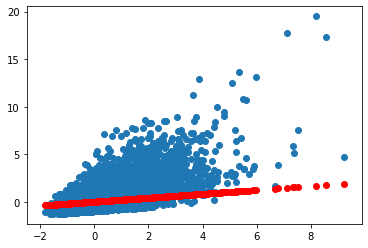

In [34]:
plt.scatter(x[:,9],y)
plt.scatter(x[:,9],prevision[:,9],color = 'red')

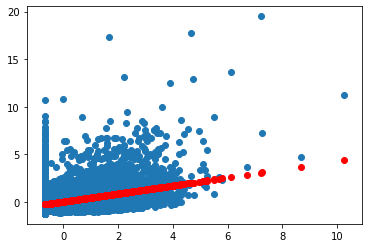

In [35]:
plt.scatter(x[:,10],y)
plt.scatter(x[:,10],prevision[:,10],color = 'red')

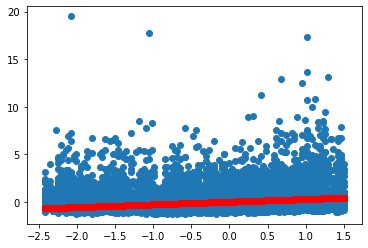

In [36]:
plt.scatter(x[:,11],y)
plt.scatter(x[:,11],prevision[:,11],color = 'red')

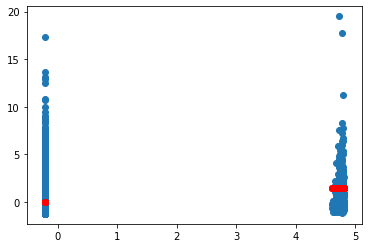

In [37]:
plt.scatter(x[:,12],y)
plt.scatter(x[:,12],prevision[:,12],color = 'red')

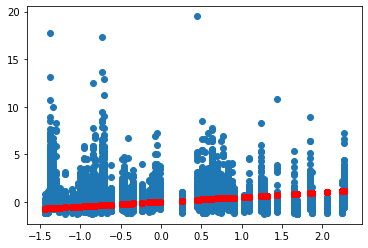

In [38]:
plt.scatter(x[:,13],y)
plt.scatter(x[:,13],prevision[:,13],color = 'red')

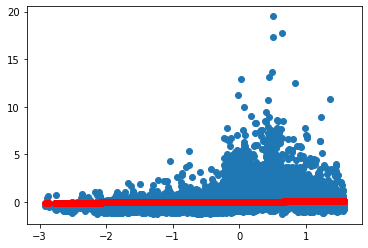

In [39]:
plt.scatter(x[:,14],y)
plt.scatter(x[:,14],prevision[:,14],color = 'red')

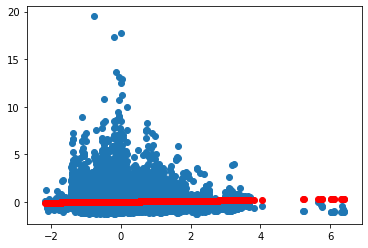

In [40]:
plt.scatter(x[:,15],y)
plt.scatter(x[:,15],prevision[:,15],color = 'red')

In [41]:
#Retomando a escala original de los datos
y1 = scalerY.inverse_transform(y) 
previsiones1 = scalerY.inverse_transform(prevision)

In [42]:
previsiones1

array([[496972.28, 336075.66, 423623.  , ..., 880961.6 , 535133.06,
        534835.25],
       [496972.28, 564839.  , 603517.  , ..., 700407.4 , 556412.94,
        527279.5 ],
       [380707.4 , 336075.66, 370560.78, ..., 369959.  , 558127.06,
        537760.06],
       ...,
       [380707.4 , 290322.97, 402915.8 , ..., 765134.4 , 543572.  ,
        529716.8 ],
       [496972.28, 610591.7 , 477979.47, ..., 366552.34, 537496.4 ,
        557746.25],
       [380707.4 , 290322.97, 402915.8 , ..., 765134.4 , 543541.56,
        529716.8 ]], dtype=float32)

In [43]:
from sklearn.metrics import mean_absolute_error

In [44]:
mae = mean_absolute_error(y1,previsiones1[:,0])
mae_1 = mean_absolute_error(y1,previsiones1[:,1])
mae_2 = mean_absolute_error(y1,previsiones1[:,2])
mae_3 = mean_absolute_error(y1,previsiones1[:,3])
mae_4 = mean_absolute_error(y1,previsiones1[:,4])
mae_5 = mean_absolute_error(y1,previsiones1[:,5])
mae_6 = mean_absolute_error(y1,previsiones1[:,6])
mae_7 = mean_absolute_error(y1,previsiones1[:,7])
mae_8 = mean_absolute_error(y1,previsiones1[:,8])
mae_9 = mean_absolute_error(y1,previsiones1[:,9])
mae_10 = mean_absolute_error(y1,previsiones1[:,10])
mae_11 = mean_absolute_error(y1,previsiones1[:,11])
mae_12 = mean_absolute_error(y1,previsiones1[:,12])
mae_13 = mean_absolute_error(y1,previsiones1[:,13])
mae_14 = mean_absolute_error(y1,previsiones1[:,14])
mae_15 = mean_absolute_error(y1,previsiones1[:,15])

In [45]:
print("Error mae regresión 1" + str(mae))
print("Error mae regresión 2" + str(mae_1))
print("Error mae regresión 3" + str(mae_2))
print("Error mae regresión 4" + str(mae_3))
print("Error mae regresión 5" + str(mae_4))
print("Error mae regresión 6" + str(mae_5))
print("Error mae regresión 7" + str(mae_6))
print("Error mae regresión 8" + str(mae_7))
print("Error mae regresión 9" + str(mae_8))
print("Error mae regresión 10" + str(mae_9))
print("Error mae regresión 11" + str(mae_10))
print("Error mae regresión 12" + str(mae_11))
print("Error mae regresión 13" + str(mae_12))
print("Error mae regresión 14" + str(mae_13))
print("Error mae regresión 15" + str(mae_14))
print("Error mae regresión 16" + str(mae_15))

Error mae regresión 1220477.61
Error mae regresión 2200700.56
Error mae regresión 3183304.89
Error mae regresión 4235181.77
Error mae regresión 5224009.58
Error mae regresión 6229668.19
Error mae regresión 7220202.45
Error mae regresión 8262910.1
Error mae regresión 9170695.83
Error mae regresión 10204112.95
Error mae regresión 11227824.25
Error mae regresión 12246712.17
Error mae regresión 13235642.9
Error mae regresión 14274833.4
Error mae regresión 15229737.58
Error mae regresión 16233517.81
